In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Spearman Plot of absolute values of ADGRD1 transcripts

In [2]:
adgrd1 = pd.read_csv("Suppl_Table_S5_Transcripts_in_tissues.xlsx - ADGRD1.csv")
adgrd1 = adgrd1[0:22]

filtered_columns = [col for col in adgrd1.columns if '(sd)' not in col and '(%)' not in col]
adgrd1 = adgrd1[filtered_columns]

num_columns_to_keep = len(adgrd1.columns) - 3
adgrd1 = adgrd1.iloc[:, :num_columns_to_keep]

tpm_columsn = adgrd1.columns[7:]
for col in tpm_columsn:
    adgrd1[col] = adgrd1[col].str.replace(',', '.').astype(float)

#rows 2,5,8,13
transcripts_to_correlate= ["NM_198827.5","NSTRG.20613.2", "NSTRG.20613.4","XM_005253566.2"]

transcripts_df = adgrd1.loc[adgrd1['transcript_id'].isin(transcripts_to_correlate)]
transcripts_df = transcripts_df.iloc[:,7:]

row1 = transcripts_df.loc[1] #"NM_198827.5
row4 = transcripts_df.loc[4] #NSTRG.20613.2
row7 = transcripts_df.loc[7] #NSTRG.20613.4
row12 = transcripts_df.loc[12] #XM_005253566.2"

corr2_5, p_value1 = pearsonr(row1, row4)
corr2_8, p_value2 = pearsonr(row1, row7)
corr2_13, p_value3= pearsonr(row1, row12)

In [3]:
transcripts_df

,TPM(mean)brain,TPM(mean)brain opioid,TPM(mean)brain alzheimer,TPM(mean)brain fetal,TPM(mean)brain frontal cortex,TPM(mean)brain parietal cortex,TPM(mean)brain occipital cortex,TPM(mean)brain striatum,TPM(mean)brain stem,TPM(mean)brain cerebellum,...,TPM(mean)vena cava,TPM(mean)trachea,TPM(mean)lung,TPM(mean)thymus,TPM(mean)spleen,TPM(mean)lymph node,TPM(mean)thyroid,TPM(mean)adrenal,TPM(mean)adipose,TPM(mean)skeletal muscle
1,0.042,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.681,1.431,12.968,0.125,0.000,0.000,0.132,0.000,12.005,0.336
4,0.372,0.293,0.472,0.333,0.254,0.108,0.396,0.273,0.385,0.104,...,6.582,2.796,2.055,0.669,0.346,0.118,1.651,0.322,3.801,0.974
7,0.169,0.440,0.721,0.024,0.349,0.354,0.173,0.152,0.122,0.021,...,0.547,0.079,0.127,0.292,0.000,0.136,0.229,0.198,0.269,0.070
12,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4.778,0.000,2.496,0.000,0.000,0.000,0.000,0.000,1.370,0.168


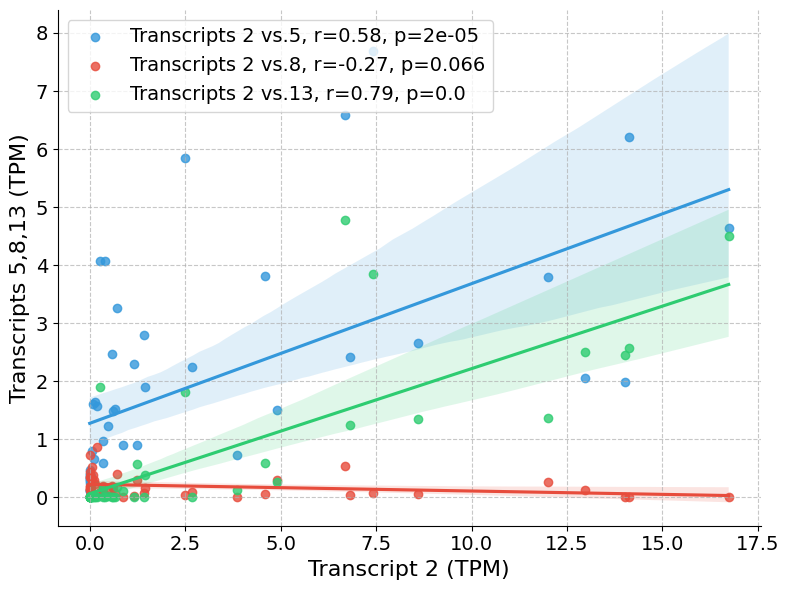

In [4]:
# Set the figure size (adjust the width and height as needed)
plt.figure(figsize=(8, 6))
plt.rc('text', usetex=False)

custom_palette = sns.color_palette(['#3498db', '#e74c3c', '#2ecc71'])
sns.set_palette(custom_palette)

# Plot the regression lines with labels
sns.regplot(x=row1, y=row4, ci=95, label="Transcripts 2 vs.5, r="+str(round(corr2_5,2))+", p="+str(round(p_value1,5)))
sns.regplot(x=row1, y=row7, ci=95, label="Transcripts 2 vs.8, r="+str(round(corr2_8,2))+", p="+str(round(p_value2,4)))
sns.regplot(x=row1, y=row12, ci=95,label="Transcripts 2 vs.13, r="+str(round(corr2_13,2))+", p="+str(round(p_value3,5)))

# Set axis labels
plt.xlabel('Transcript 2 (TPM)', fontsize=16)
plt.ylabel('Transcripts 5,8,13 (TPM)', fontsize=16)

# Increase tick label font size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines
plt.grid(True)

legend = plt.legend(loc='upper left', fontsize=14)
legend.get_frame().set_edgecolor('0.8')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Save the figure as a PNG file (you can change the format and filename as needed)
plt.tight_layout()
plt.savefig('your_figure.png', dpi=600)

# Show the plot (optional)
plt.show()

# Violin plot of relative expressions of all transcripts

/tmp/ipykernel_55991/736678200.py:24: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=plot_df, inner="point", scale="width", color='white', edgecolor='black', cut=0)


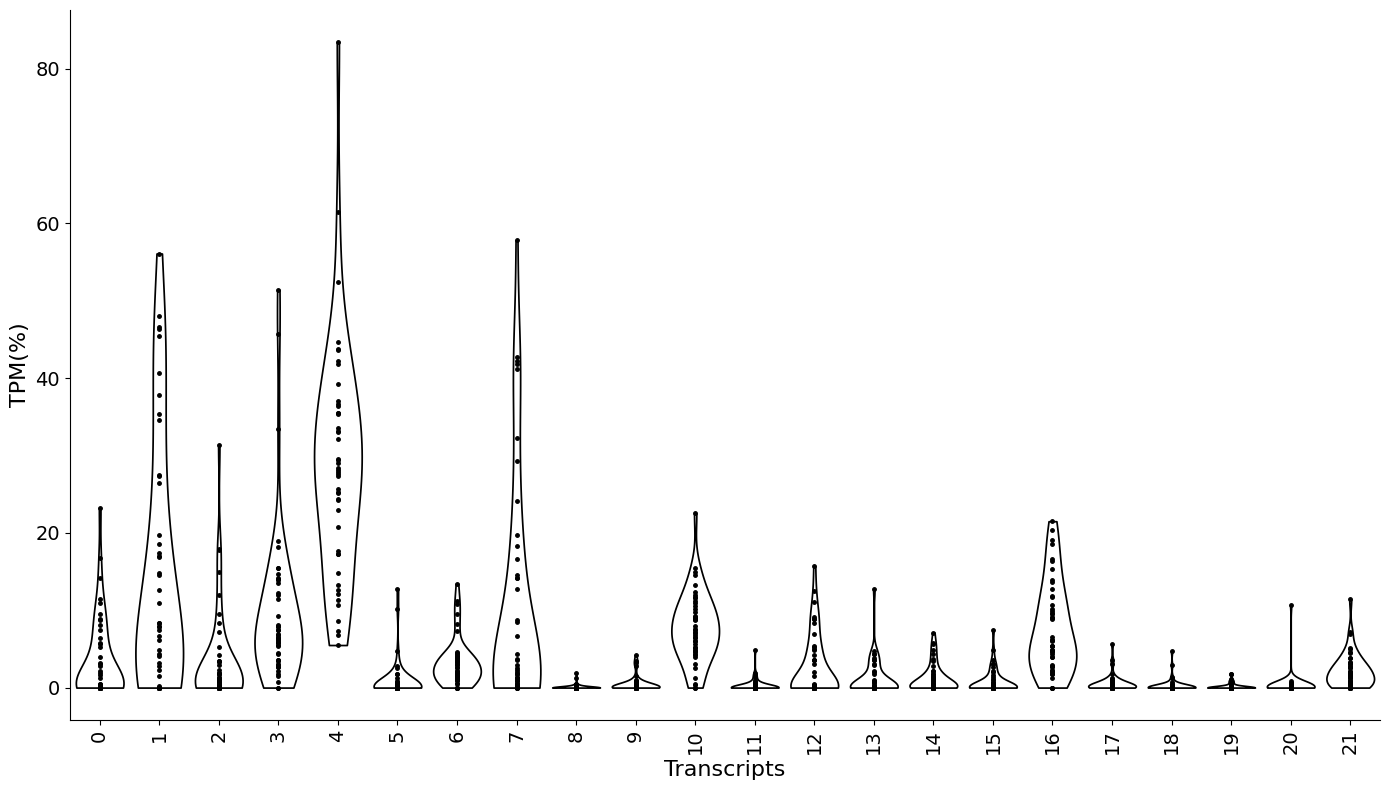

In [5]:
adgrd1 = pd.read_csv("Suppl_Table_S5_Transcripts_in_tissues.xlsx - ADGRD1.csv")
adgrd1 = adgrd1[0:22]

filtered_columns = [col for col in adgrd1.columns if '(sd)' not in col and '(mean)' not in col]
adgrd1 = adgrd1[filtered_columns]
num_columns_to_keep = len(adgrd1.columns) - 3
adgrd1 = adgrd1.iloc[:, :num_columns_to_keep]
adgrd1

tpm_columns = adgrd1.columns[7:]
for col in tpm_columns:
    adgrd1[col] = adgrd1[col].str.replace(',', '.').astype(float)

# Create a DataFrame for plotting
plot_df = adgrd1[tpm_columns]

# Transpose the DataFrame to have TPM(%) columns on the x-axis
plot_df = plot_df.T

# Set figure size
plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(data=plot_df, inner="point", scale="width", color='white', edgecolor='black', cut=0)
# sns.stripplot(data=plot_df, jitter=True, color='black', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set labels and title
plt.xlabel('Transcripts', fontsize=16)
plt.ylabel('TPM(%)', fontsize=16)
# plt.title('Violin Plot of TPM(%) for Each Row', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, inner='box', split=False, width=0.8, dodge='auto', gap=0, linewidth=None, linecolor='auto', cut=2, gridsize=100, bw_method='scott', bw_adjust=1, density_norm='area', common_norm=False, hue_norm=None, formatter=None, log_scale=None, native_scale=False, legend='auto', scale=<deprecated>, scale_hue=<deprecated>, bw=<deprecated>, inner_kws=None, ax=None, **kwargs)
    Draw a patch representing a KDE and add observations or box plot statistics.
    
    A violin plot plays a similar role as a box-and-whisker plot. It shows the
    distribution of data points after grouping by one (or more) variables.
    Unlike a box plot, each violin is drawn using a kernel density estimate
    of the underlying distribution.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
 

/tmp/ipykernel_55991/3353856305.py:29: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=plot_df, inner="point", scale="width", color='white', edgecolor='black', cut=0, ax=axs[0])


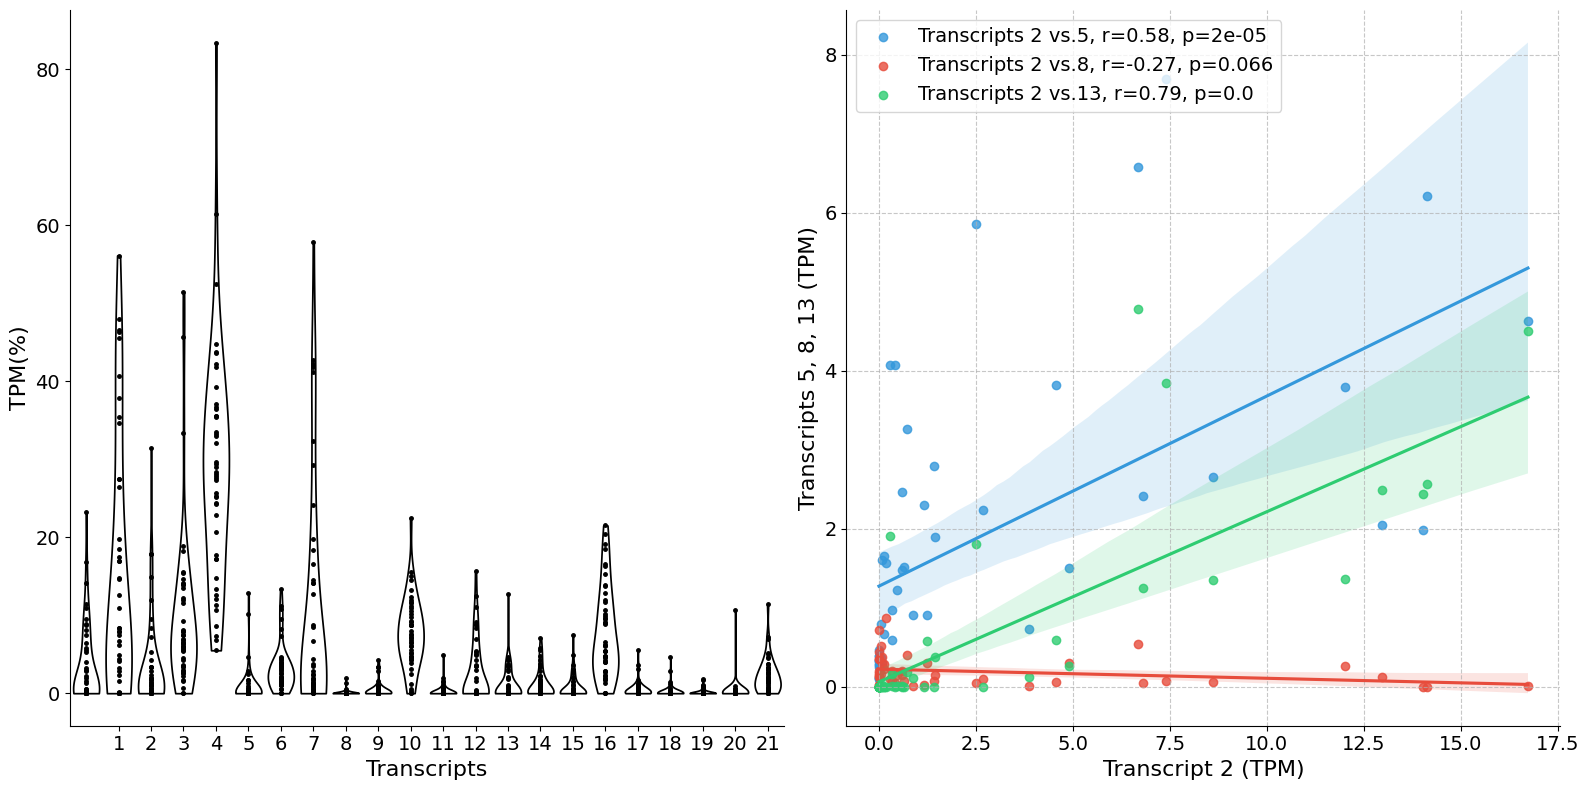

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
adgrd1 = pd.read_csv("Suppl_Table_S5_Transcripts_in_tissues.xlsx - ADGRD1.csv")
adgrd1 = adgrd1.iloc[0:22]

filtered_columns = [col for col in adgrd1.columns if '(sd)' not in col and '(mean)' not in col]
adgrd1 = adgrd1[filtered_columns]
num_columns_to_keep = len(adgrd1.columns) - 3
adgrd1 = adgrd1.iloc[:, :num_columns_to_keep]

tpm_columns = adgrd1.columns[7:]
for col in tpm_columns:
    adgrd1[col] = adgrd1[col].str.replace(',', '.').astype(float)

# Create a DataFrame for plotting
plot_df = adgrd1[tpm_columns]

# Transpose the DataFrame to have TPM(%) columns on the x-axis
plot_df = plot_df.T

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the violin plot in the first subplot
sns.violinplot(data=plot_df, inner="point", scale="width", color='white', edgecolor='black', cut=0, ax=axs[0])

# Customize the first subplot
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].set_xlabel('Transcripts', fontsize=16)
axs[0].set_ylabel('TPM(%)', fontsize=16)
axs[0].tick_params(labelsize=14)
# axs[0].set_xlim(left=0.5)

xticks = np.arange(1, 22)
axs[0].set_xticks(xticks)
# axs[0].set_xticklabels(xticks, rotation=0)

# Move the x-axis label at 0.5 to the left
# axs[0].set_xticklabels([f'{tick:.1f}' if tick == 0.5 else f'{tick:.0f}' for tick in axs[0].get_xticks()])

# Plot the second plot in the second subplot
custom_palette = sns.color_palette(['#3498db', '#e74c3c', '#2ecc71'])
sns.set_palette(custom_palette)
sns.regplot(x=row1, y=row4, ci=95, label="Transcripts 2 vs.5, r="+str(round(corr2_5,2))+", p="+str(round(p_value1,5)), ax=axs[1])
sns.regplot(x=row1, y=row7, ci=95, label="Transcripts 2 vs.8, r="+str(round(corr2_8,2))+", p="+str(round(p_value2,4)), ax=axs[1])
sns.regplot(x=row1, y=row12, ci=95, label="Transcripts 2 vs.13, r="+str(round(corr2_13,2))+", p="+str(round(p_value3,5)), ax=axs[1])

# Customize the second subplot
axs[1].set_xlabel('Transcript 2 (TPM)', fontsize=16)
axs[1].set_ylabel('Transcripts 5, 8, 13 (TPM)', fontsize=16)
axs[1].tick_params(labelsize=14)
axs[1].grid(True)
legend = axs[1].legend(loc='upper left', fontsize=14)
legend.get_frame().set_edgecolor('0.8')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('combined_figure.png', dpi=600)

# Show the plot (optional)
plt.show()